In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet

#import plotly.express as px
#import follum
#from follum import plugins
import matplotlib.colors as mcolors
import math
import random
import time
import datetime
import operator
plt.style.use('seaborn')
%matplotlib inline  
# omporting our models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# model Evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import mean_absolute_error, mean_squared_error

import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder


## Loading The DataSet

In [0]:
confirmed_cases = pd.read_csv("time_series_covid_19_confirmed.csv")
death_cases = pd.read_csv("time_series_covid_19_deaths.csv")
recovered_cases = pd.read_csv("time_series_covid_19_recovered.csv")

In [0]:
confirmed_cases


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664,7072,7653,8145,8676
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773,782,789,795,803,820,832,842,850,856,868,872,876,880,898,916,933,946,948,949,964,969
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006,4154,4295,4474,4648,4838,4997,5182,5369,5558,5723,5891,6067,6253,6442,6629,6821,7019,7201,7377,7542,7728
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738,743,743,743,745,745,747,748,750,751,751,752,752,754,755,755,758,760,761,761,761,761,761,761,762,762
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26,27,27,27,27,30,35,35,35,36,36,36,43,43,45,45,45,45,48,48,48,48,50,52,52,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,8,8,14,16,16,16,23,174,174,187,208,208,208,208,208,220,235,235,235,235,246,251,251,251
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,6,6,7,10,10,12,22,25,25,34,34,51,56,65,70,85,106,122,128,130,167,184,197
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,3,3,3,8,8,8,11,11,11,11,11,11,11,11,11,11,11,34,34
264,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,15,76,128,230,293,379,461,522,612,612,661,729,801,907,1118,1322,1524,1729,1936,2140,2350


In [0]:
confirmed_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 125 entries, Province/State to 5/21/20
dtypes: float64(2), int64(121), object(2)
memory usage: 259.9+ KB


In [0]:
confirmed_cases.isna().sum()

Province/State    185
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
5/17/20             0
5/18/20             0
5/19/20             0
5/20/20             0
5/21/20             0
Length: 125, dtype: int64

In [0]:
# Lodaing the keys using the columns 
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '5/12/20', '5/13/20', '5/14/20', '5/15/20', '5/16/20', '5/17/20',
       '5/18/20', '5/19/20', '5/20/20', '5/21/20'],
      dtype='object', length=125)

In [0]:
## Extraxting only the date columns from the data
confirmed = confirmed_cases.loc[:,cols[4]:cols[-1]]

deaths = death_cases.loc[:,cols[4]:cols[-1]]


recovered = recovered_cases.loc[:,cols[4]:cols[-1]]

In [0]:
confirmed


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664,7072,7653,8145,8676
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773,782,789,795,803,820,832,842,850,856,868,872,876,880,898,916,933,946,948,949,964,969
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006,4154,4295,4474,4648,4838,4997,5182,5369,5558,5723,5891,6067,6253,6442,6629,6821,7019,7201,7377,7542,7728
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738,743,743,743,745,745,747,748,750,751,751,752,752,754,755,755,758,760,761,761,761,761,761,761,762,762
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26,27,27,27,27,30,35,35,35,36,36,36,43,43,45,45,45,45,48,48,48,48,50,52,52,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,8,8,14,16,16,16,23,174,174,187,208,208,208,208,208,220,235,235,235,235,246,251,251,251
262,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,6,6,7,10,10,12,22,25,25,34,34,51,56,65,70,85,106,122,128,130,167,184,197
263,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,3,3,3,8,8,8,11,11,11,11,11,11,11,11,11,11,11,34,34
264,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,15,76,128,230,293,379,461,522,612,612,661,729,801,907,1118,1322,1524,1729,1936,2140,2350


In [0]:
confirmed["5/21/20"].sum()

5102424

In [0]:
## Finding the total confirmed cases , deaths cases and appending it into the list
### also finding the mortality rate which is the death_sum/confirmed-cases
dates = confirmed.keys()
world_cases = []
total_deaths = []
mortality_rate  = []
total_recovered = []

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recovered[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [0]:
confirmed_sum

5102424

In [0]:
## Convert all the Dates into the numpy array
day_since_1_22  = np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases = np.array(world_cases).reshape(-1,1)
total_deaths = np.array(total_deaths).reshape(-1,1)
total_recovered = np.array(total_recovered).reshape(-1,1)

In [0]:
day_since_1_22, world_cases

(array([[  0],
        [  1],
        [  2],
        [  3],
        [  4],
        [  5],
        [  6],
        [  7],
        [  8],
        [  9],
        [ 10],
        [ 11],
        [ 12],
        [ 13],
        [ 14],
        [ 15],
        [ 16],
        [ 17],
        [ 18],
        [ 19],
        [ 20],
        [ 21],
        [ 22],
        [ 23],
        [ 24],
        [ 25],
        [ 26],
        [ 27],
        [ 28],
        [ 29],
        [ 30],
        [ 31],
        [ 32],
        [ 33],
        [ 34],
        [ 35],
        [ 36],
        [ 37],
        [ 38],
        [ 39],
        [ 40],
        [ 41],
        [ 42],
        [ 43],
        [ 44],
        [ 45],
        [ 46],
        [ 47],
        [ 48],
        [ 49],
        [ 50],
        [ 51],
        [ 52],
        [ 53],
        [ 54],
        [ 55],
        [ 56],
        [ 57],
        [ 58],
        [ 59],
        [ 60],
        [ 61],
        [ 62],
        [ 63],
        [ 64],
        [ 65],
        [ 

## Dates for Future Forecasting

In [0]:
days_in_future = 10
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates = future_forecast[:-10]

In [0]:
future_forecast.shape

(131, 1)

In [0]:
confirmed_cases.columns.value_counts()

2/27/20    1
4/6/20     1
3/26/20    1
1/29/20    1
1/25/20    1
          ..
3/6/20     1
3/5/20     1
3/9/20     1
4/29/20    1
4/1/20     1
Length: 125, dtype: int64

## Converting all the integers into the date Time

In [0]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, "%m/%d/%Y")
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date+datetime.timedelta(days=i)).strftime("%m/%d/%Y"))

In [0]:
future_forecast_dates

['01/22/2020',
 '01/23/2020',
 '01/24/2020',
 '01/25/2020',
 '01/26/2020',
 '01/27/2020',
 '01/28/2020',
 '01/29/2020',
 '01/30/2020',
 '01/31/2020',
 '02/01/2020',
 '02/02/2020',
 '02/03/2020',
 '02/04/2020',
 '02/05/2020',
 '02/06/2020',
 '02/07/2020',
 '02/08/2020',
 '02/09/2020',
 '02/10/2020',
 '02/11/2020',
 '02/12/2020',
 '02/13/2020',
 '02/14/2020',
 '02/15/2020',
 '02/16/2020',
 '02/17/2020',
 '02/18/2020',
 '02/19/2020',
 '02/20/2020',
 '02/21/2020',
 '02/22/2020',
 '02/23/2020',
 '02/24/2020',
 '02/25/2020',
 '02/26/2020',
 '02/27/2020',
 '02/28/2020',
 '02/29/2020',
 '03/01/2020',
 '03/02/2020',
 '03/03/2020',
 '03/04/2020',
 '03/05/2020',
 '03/06/2020',
 '03/07/2020',
 '03/08/2020',
 '03/09/2020',
 '03/10/2020',
 '03/11/2020',
 '03/12/2020',
 '03/13/2020',
 '03/14/2020',
 '03/15/2020',
 '03/16/2020',
 '03/17/2020',
 '03/18/2020',
 '03/19/2020',
 '03/20/2020',
 '03/21/2020',
 '03/22/2020',
 '03/23/2020',
 '03/24/2020',
 '03/25/2020',
 '03/26/2020',
 '03/27/2020',
 '03/28/20

In [0]:
latest_confirmed = confirmed_cases[dates[-1]]
latest_deaths = death_cases[dates[-1]]
latest_recovered = recovered_cases[dates[-1]]
latest_india = confirmed_cases["Country/Region"=='India'][dates[-1]]

KeyError: ignored

In [0]:
pd.DataFrame(latest_confirmed).head()

,5/21/20
0,8676
1,969
2,7728
3,762
4,58


## Find the list of Uniqiue Countries

In [0]:
unique_countries = list(confirmed_cases["Country/Region"].unique())
unique_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Diamond Princess',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guyana',
 'Haiti',
 'Holy See',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq'

In [0]:
latest_confirmed[confirmed_cases["Country/Region"]=='India'].sum()

118226

In [0]:
## Calculating the Total Number of Confirmed cases by each country
country_conf_cases = []
no_cases = []

for i in unique_countries:
    ## confirmed_cases["country/region"]=i return the boolean value corresponding
    ## to the row of which country means total case on that particular date
    ###of that particular country
    cases = latest_confirmed[confirmed_cases["Country/Region"]==i].sum()
    if cases>0:
        country_conf_cases.append(cases)
    else:
        no_cases.append(i)
        
        
for i in no_cases:
    unique_countries.remove(i)
    
unique_countries = [k for k,v in sorted(zip(unique_countries, country_conf_cases), key=operator.itemgetter(1),reverse=True)] 
for i in range(len(unique_countries)):
    country_conf_cases[i] = latest_confirmed[confirmed_cases["Country/Region"]==unique_countries[i]].sum()
    

In [0]:
for i in range(len(unique_countries)):
    print(f"{unique_countries[i]}: {country_conf_cases[i]}")

US: 1577147
Russia: 317554
Brazil: 310087
United Kingdom: 252246
Spain: 233037
Italy: 228006
France: 181951
Germany: 179021
Turkey: 153548
Iran: 129341
India: 118226
Peru: 108769
China: 84063
Canada: 82742
Saudi Arabia: 65077
Mexico: 59567
Chile: 57581
Belgium: 56235
Pakistan: 48091
Netherlands: 44900
Qatar: 38651
Ecuador: 35306
Belarus: 33371
Sweden: 32172
Switzerland: 30694
Portugal: 29912
Singapore: 29812
Bangladesh: 28511
United Arab Emirates: 26898
Ireland: 24391
Indonesia: 20162
Poland: 20143
Ukraine: 19706
South Africa: 19137
Kuwait: 18609
Colombia: 18330
Romania: 17585
Israel: 16683
Japan: 16424
Austria: 16404
Egypt: 15003
Dominican Republic: 13657
Philippines: 13434
Denmark: 11380
Korea, South: 11142
Serbia: 10919
Panama: 10116
Argentina: 9931
Czechia: 8754
Afghanistan: 8676
Norway: 8309
Bahrain: 8174
Algeria: 7728
Kazakhstan: 7234
Morocco: 7211
Australia: 7095
Malaysia: 7059
Nigeria: 7016
Moldova: 6704
Finland: 6493
Oman: 6370
Ghana: 6269
Armenia: 5606
Bolivia: 5187
Cameroon:

In [0]:
len(unique_countries)

188

In [0]:
unique_countries

['US',
 'Russia',
 'Brazil',
 'United Kingdom',
 'Spain',
 'Italy',
 'France',
 'Germany',
 'Turkey',
 'Iran',
 'India',
 'Peru',
 'China',
 'Canada',
 'Saudi Arabia',
 'Mexico',
 'Chile',
 'Belgium',
 'Pakistan',
 'Netherlands',
 'Qatar',
 'Ecuador',
 'Belarus',
 'Sweden',
 'Switzerland',
 'Portugal',
 'Singapore',
 'Bangladesh',
 'United Arab Emirates',
 'Ireland',
 'Indonesia',
 'Poland',
 'Ukraine',
 'South Africa',
 'Kuwait',
 'Colombia',
 'Romania',
 'Israel',
 'Japan',
 'Austria',
 'Egypt',
 'Dominican Republic',
 'Philippines',
 'Denmark',
 'Korea, South',
 'Serbia',
 'Panama',
 'Argentina',
 'Czechia',
 'Afghanistan',
 'Norway',
 'Bahrain',
 'Algeria',
 'Kazakhstan',
 'Morocco',
 'Australia',
 'Malaysia',
 'Nigeria',
 'Moldova',
 'Finland',
 'Oman',
 'Ghana',
 'Armenia',
 'Bolivia',
 'Cameroon',
 'Luxembourg',
 'Iraq',
 'Azerbaijan',
 'Hungary',
 'Honduras',
 'Sudan',
 'Guinea',
 'Thailand',
 'Uzbekistan',
 'Greece',
 'Senegal',
 'Guatemala',
 'Bosnia and Herzegovina',
 'Tajik

In [0]:
# Handling the missing Values
nan_indices=[]
for i in range(len(unique_countries)):
    if type(unique_countries[i])==float:
        nan_indices.append(i)
        
unique_countries = list(unique_countries)

for i in nan_indices:
    unique_countries.pop(i)
        

In [0]:
nan_indices

[]

In [0]:
## Top 10 cases Countries
top_countries =[]
top_cases = []
for i in range(10):
    top_countries.append(unique_countries[i])
    top_cases.append(country_conf_cases[i])

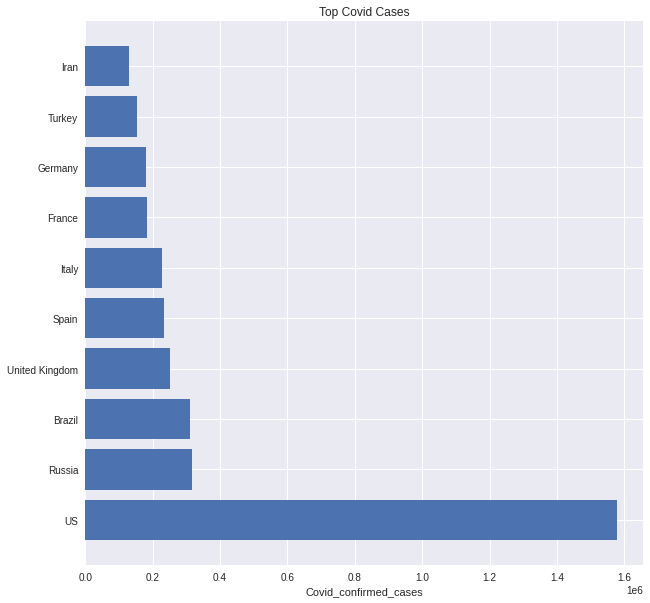

In [0]:
## Plotting the Graph of top 10 countries
plt.figure(figsize = (10,10))
plt.barh(top_countries, top_cases)
plt.title("Top Covid Cases")
plt.xlabel("Covid_confirmed_cases")
plt.show()

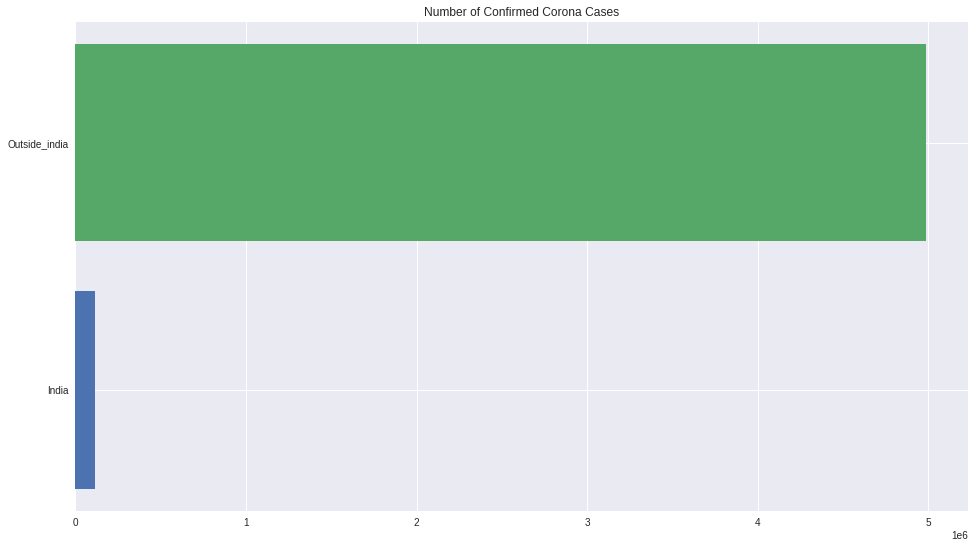

In [0]:
## Plotting India Confirmed Cases Vs Outside Confirmed cases
india_confirmed_cases = latest_confirmed[confirmed_cases["Country/Region"]=='India'].sum()
outside_india = np.sum(country_conf_cases)-india_confirmed_cases
plt.figure(figsize=(16,9))
plt.barh("India", india_confirmed_cases)
plt.barh("Outside_india", outside_india)
plt.title("Number of Confirmed Corona Cases")
plt.show()

## Creating The SVM Model

In [0]:
day_since_1_22

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [0]:
## Spliting the test and train Data
X_train, X_test, y_train, y_test = train_test_split(day_since_1_22, world_cases, test_size=0.15, shuffle = False)


In [0]:
kernel = ['poly', 'sigmoid', 'rbf']
c=[0.01, 0.1, 1,10]
gamma = [0.01, 0.1,1]
epsilon = [0.01,0.1,1]
shrinking = [True,False]
svm_grid = {'kernel':kernel, 'C':c, 'gamma':gamma, 'epsilon':epsilon, 'shrinking':shrinking}

svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring = 'neg_mean_squared_error', cv=3,return_train_score=True, n_jobs=-1,n_iter=40, verbose=True)
svm_search.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.8min finished
/home/hritvik-ubuntu/Downloads/mlproject/env/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=40, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['poly', 'sigmoid', 'rbf'],
                                        'shrinking': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=True)

In [0]:
## Searching For the Best Parameters
svm_search.best_params_

{'shrinking': True, 'kernel': 'poly', 'gamma': 1, 'epsilon': 0.01, 'C': 10}

In [0]:
svm_confirmed = svm_search.best_estimator_ ## It gives best suited parameter which gives the highest score

In [0]:
svm_pred = svm_confirmed.predict(future_forecast)

## Evaluating The model Against Our Test Data

MAE 526686.3169308429
MSE 282664529720.8257


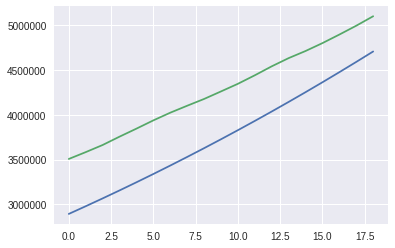

In [0]:
y_pred = svm_confirmed.predict(X_test)
plt.plot(y_pred)
plt.plot(y_test)
print("MAE", mean_absolute_error(y_pred, y_test))
print("MSE", mean_squared_error(y_pred, y_test))


In [0]:
set(zip(future_forecast_dates[-10:], svm_pred[-10:]))

{('05/22/2020', 4827046.9182665255),
 ('05/23/2020', 4947668.9885790255),
 ('05/24/2020', 5070284.7502977755),
 ('05/25/2020', 5194910.5823290255),
 ('05/26/2020', 5321562.7854540255),
 ('05/27/2020', 5450257.7463915255),
 ('05/28/2020', 5581011.7659227755),
 ('05/29/2020', 5713841.2112352755),
 ('05/30/2020', 5848762.4221727755),
 ('05/31/2020', 5985791.7034227755)}

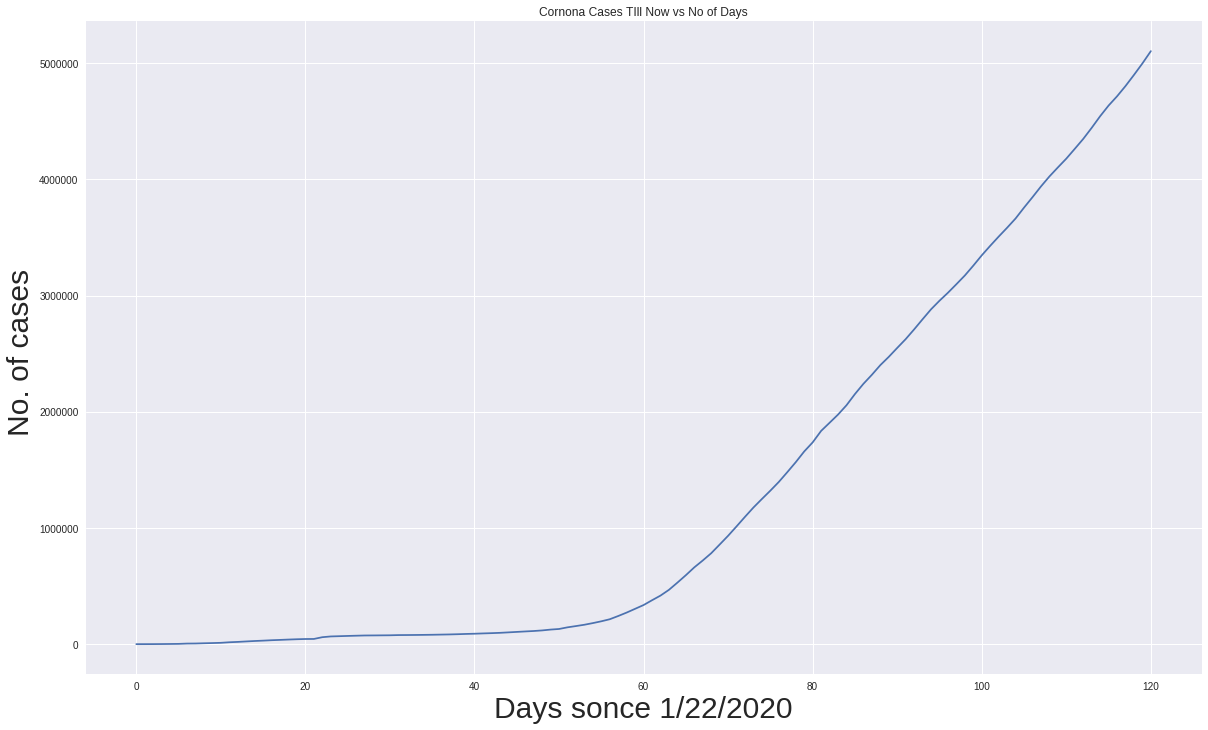

In [0]:
## number of Corona cases Over Time
plt.figure(figsize = (20,12))
plt.plot(adjusted_dates, world_cases)
plt.title("Cornona Cases TIll Now vs No of Days")
plt.xlabel("Days sonce 1/22/2020", size = 30)
plt.ylabel("No. of cases ", size = 30)
plt.show()

In [0]:
type(day_since_1_22), type(world_cases), day_since_1_22.shape

(numpy.ndarray, numpy.ndarray, (121, 1))

In [0]:
df_world = pd.DataFrame( dates, columns = ['dates'])

In [0]:
df_world['confirmed'] = world_cases
df_world

,confirmed,dates
0,555,1/22/20
1,654,1/23/20
2,941,1/24/20
3,1434,1/25/20
4,2118,1/26/20
...,...,...
116,4713620,5/17/20
117,4801943,5/18/20
118,4897492,5/19/20
119,4996472,5/20/20


In [0]:
dates

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '5/12/20', '5/13/20', '5/14/20', '5/15/20', '5/16/20', '5/17/20',
       '5/18/20', '5/19/20', '5/20/20', '5/21/20'],
      dtype='object', length=121)

In [0]:
future_forecast_dates

array([[['01/22/2020', '01/23/2020', '01/24/2020', '01/25/2020',
         '01/26/2020', '01/27/2020', '01/28/2020', '01/29/2020',
         '01/30/2020', '01/31/2020', '02/01/2020', '02/02/2020',
         '02/03/2020', '02/04/2020', '02/05/2020', '02/06/2020',
         '02/07/2020', '02/08/2020', '02/09/2020', '02/10/2020',
         '02/11/2020', '02/12/2020', '02/13/2020', '02/14/2020',
         '02/15/2020', '02/16/2020', '02/17/2020', '02/18/2020',
         '02/19/2020', '02/20/2020', '02/21/2020', '02/22/2020',
         '02/23/2020', '02/24/2020', '02/25/2020', '02/26/2020',
         '02/27/2020', '02/28/2020', '02/29/2020', '03/01/2020',
         '03/02/2020', '03/03/2020', '03/04/2020', '03/05/2020',
         '03/06/2020', '03/07/2020', '03/08/2020', '03/09/2020',
         '03/10/2020', '03/11/2020', '03/12/2020', '03/13/2020',
         '03/14/2020', '03/15/2020', '03/16/2020', '03/17/2020',
         '03/18/2020', '03/19/2020', '03/20/2020', '03/21/2020',
         '03/22/2020', '0

In [0]:
world_cases.shape

(121, 1)

In [0]:
df_world.columns = ['y', 'ds']
df_world['ds'] =  pd.to_datetime(df_world['ds'])


In [0]:
m = Prophet(interval_width=0.95)
m.fit(df_world)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
123,2020-05-24
124,2020-05-25
125,2020-05-26
126,2020-05-27
127,2020-05-28


In [0]:
forecast = m.predict(future)

In [0]:
set(zip(future_forecast_dates[-14:], forecast["trend"].tail(10)))

{('05/18/2020', 4882207.613013914),
 ('05/19/2020', 4967411.997693577),
 ('05/20/2020', 5052616.382373239),
 ('05/21/2020', 5137820.7670529),
 ('05/22/2020', 5223025.151732562),
 ('05/23/2020', 5308229.536412224),
 ('05/24/2020', 5393433.921091888),
 ('05/25/2020', 5478638.30577155),
 ('05/26/2020', 5563842.690451212),
 ('05/27/2020', 5649047.075130874)}

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<function matplotlib.pyplot.show>

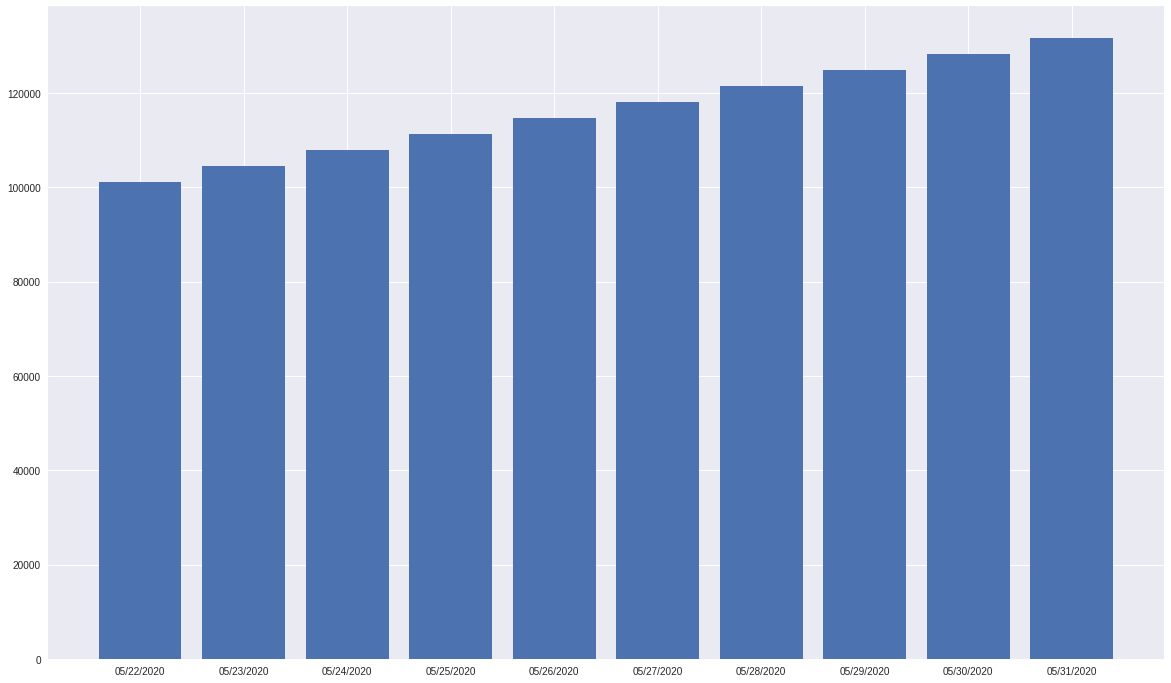

In [0]:
plt.figure(figsize=(20,12))
plt.bar(future_forecast_dates[-10:], forecast["trend"].tail(10))
plt.show

In [0]:
forecast['trend'].tail(10).shape, np.array(future_forecast_dates[-10:]).shape

((10,), (10,))

In [0]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-3.413105e+03,-2.720796e+04,1.149649e+04,-3.413105e+03,-3.413105e+03,-3750.139831,-3750.139831,-3750.139831,-3750.139831,-3750.139831,-3750.139831,0.0,0.0,0.0,-7.163245e+03
1,2020-01-23,-1.815414e+03,-1.846056e+04,1.847007e+04,-1.815414e+03,-1.815414e+03,1205.257695,1205.257695,1205.257695,1205.257695,1205.257695,1205.257695,0.0,0.0,0.0,-6.101560e+02
2,2020-01-24,-2.177221e+02,-1.583596e+04,2.163474e+04,-2.177221e+02,-2.177221e+02,2621.496635,2621.496635,2621.496635,2621.496635,2621.496635,2621.496635,0.0,0.0,0.0,2.403775e+03
3,2020-01-25,1.379969e+03,-1.535930e+04,2.344895e+04,1.379969e+03,1.379969e+03,3029.534940,3029.534940,3029.534940,3029.534940,3029.534940,3029.534940,0.0,0.0,0.0,4.409504e+03
4,2020-01-26,2.977661e+03,-1.334673e+04,2.468201e+04,2.977661e+03,2.977661e+03,2448.708924,2448.708924,2448.708924,2448.708924,2448.708924,2448.708924,0.0,0.0,0.0,5.426370e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,2020-05-24,5.308230e+06,5.287843e+06,5.337687e+06,5.291708e+06,5.329672e+06,2448.708924,2448.708924,2448.708924,2448.708924,2448.708924,2448.708924,0.0,0.0,0.0,5.310678e+06
124,2020-05-25,5.393434e+06,5.359754e+06,5.424796e+06,5.366098e+06,5.426655e+06,-1444.087468,-1444.087468,-1444.087468,-1444.087468,-1444.087468,-1444.087468,0.0,0.0,0.0,5.391990e+06
125,2020-05-26,5.478638e+06,5.429819e+06,5.520619e+06,5.440078e+06,5.523322e+06,-4110.770894,-4110.770894,-4110.770894,-4110.770894,-4110.770894,-4110.770894,0.0,0.0,0.0,5.474528e+06
126,2020-05-27,5.563843e+06,5.509510e+06,5.618832e+06,5.512765e+06,5.619804e+06,-3750.139831,-3750.139831,-3750.139831,-3750.139831,-3750.139831,-3750.139831,0.0,0.0,0.0,5.560093e+06


In [0]:
india_cases = confirmed_cases[confirmed_cases["Country/Region"]=='India']

In [0]:
india_cases = india_cases.loc[:,cols[4]:cols[-1]]

In [0]:
india_cases['3/28/20'].sum()

987

In [0]:
india_confirmed = []
for i in dates:
  india_confirmed.append(india_cases[i].sum())

In [0]:
india_confirmed

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 5,
 5,
 28,
 30,
 31,
 34,
 39,
 43,
 56,
 62,
 73,
 82,
 102,
 113,
 119,
 142,
 156,
 194,
 244,
 330,
 396,
 499,
 536,
 657,
 727,
 887,
 987,
 1024,
 1251,
 1397,
 1998,
 2543,
 2567,
 3082,
 3588,
 4778,
 5311,
 5916,
 6725,
 7598,
 8446,
 9205,
 10453,
 11487,
 12322,
 13430,
 14352,
 15722,
 17615,
 18539,
 20080,
 21370,
 23077,
 24530,
 26283,
 27890,
 29451,
 31324,
 33062,
 34863,
 37257,
 39699,
 42505,
 46437,
 49400,
 52987,
 56351,
 59695,
 62808,
 67161,
 70768,
 74292,
 78055,
 81997,
 85784,
 90648,
 95698,
 100328,
 106475,
 112028,
 118226]

In [0]:
## Using The Facebook Prophet
df_india = pd.DataFrame(dates, columns=['dates'])
df_india['confirmed'] = india_confirmed

In [0]:
df_india

,dates,confirmed
0,1/22/20,0
1,1/23/20,0
2,1/24/20,0
3,1/25/20,0
4,1/26/20,0
...,...,...
116,5/17/20,95698
117,5/18/20,100328
118,5/19/20,106475
119,5/20/20,112028


In [0]:
df_india.columns = ['ds', 'y']
df_india['ds'] =  pd.to_datetime(df_india['ds'])

In [0]:
m = Prophet(interval_width=0.95)
m.fit(df_india)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
forecast = m.predict(future)

In [0]:
forecast["trend"].tail(10)

118    101129.494414
119    104538.853720
120    107948.213026
121    111357.572333
122    114766.931639
123    118176.290945
124    121585.650251
125    124995.009557
126    128404.368864
127    131813.728170
Name: trend, dtype: float64

In [0]:
set(zip(future_forecast_dates[-14:-3],forecast["trend"].tail(10)))

{('05/18/2020', 101129.49441395266),
 ('05/19/2020', 104538.85372015511),
 ('05/20/2020', 107948.2130263575),
 ('05/21/2020', 111357.57233255988),
 ('05/22/2020', 114766.93163876227),
 ('05/23/2020', 118176.29094496471),
 ('05/24/2020', 121585.65025116716),
 ('05/25/2020', 124995.0095573696),
 ('05/26/2020', 128404.36886357199),
 ('05/27/2020', 131813.72816977437)}

In [0]:
india_cases['5/21/20'].sum()

118226

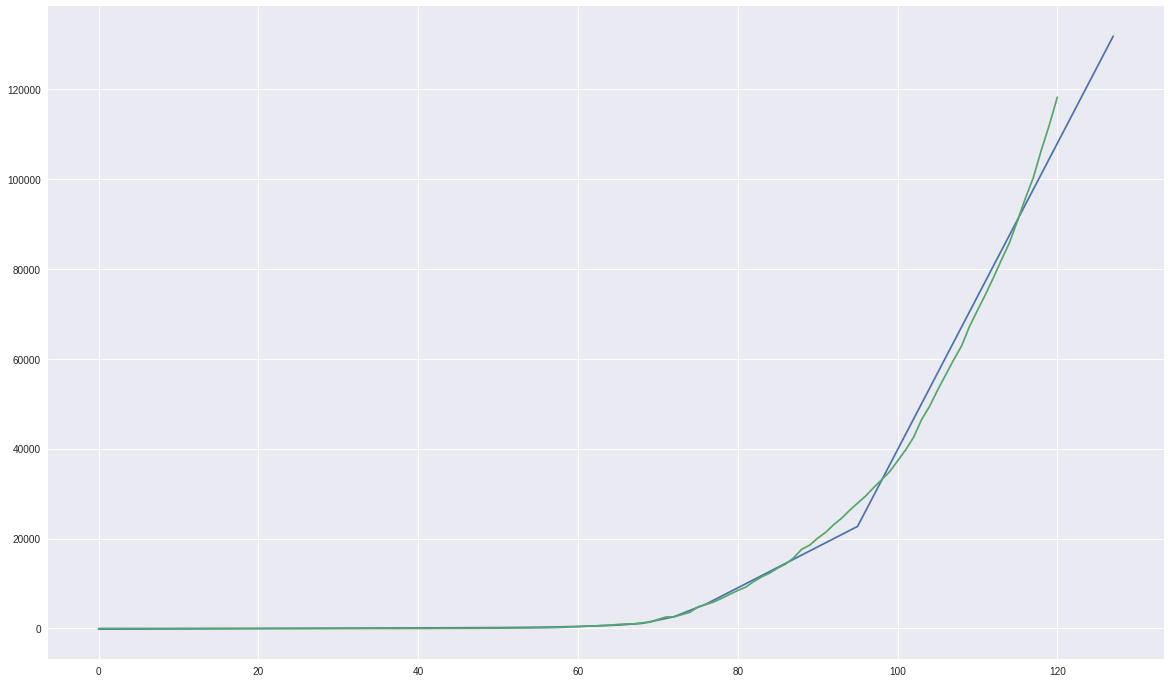

In [0]:
## Ploting Graph
plt.figure(figsize=(20,12))
plt.plot(forecast['trend'])
plt.plot(india_confirmed)
plt.show()

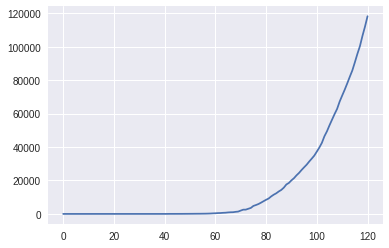

In [0]:
plt.plot(india_confirmed)